In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
N_VOTERS = 1_000
TOTAL_REP = 1_000_000
oligarch_factor = 0.01  # What % of voters can make 51% of all reputation

n_oligarchs = int(N_VOTERS * oligarch_factor)
n_plebs = N_VOTERS - n_oligarchs

oligarch_total_rep = int(TOTAL_REP * 0.51)
pleb_total_rep = TOTAL_REP - oligarch_total_rep

distribution_of_plebs = 'uniform'
distribution_of_oligarchs = 'linear'

## Linear distribution
$S = \frac{n}{2}(2a + (n - 1)d)$

$d = \frac{\frac{2S}{n} - 2a}{n - 1}$

$a$ is the minimum rep of given group, $0$ for plebs, $max(pleb\_rep)$ for oligarchs

In [214]:
def get_uniform(total, n, a):
    return np.ones(n) * (total / n)

def get_linear(total, n, a):
    d = (((2 * total) / n) - (2 * a)) / (n - 1)
    first, last = a, (n - 1) * d
    return np.linspace(first, last, n)

dist_function = {
    'uniform': get_uniform,
    'linear': get_linear
}

In [215]:
pleb_merit = dist_function[distribution_of_plebs](pleb_total_rep, n_plebs, 0)
oligarch_merit = dist_function[distribution_of_oligarchs](oligarch_total_rep, n_oligarchs, 5 * max(pleb_merit))

In [216]:
penalty_exponent = 1 / 2
max_vote = (2 * oligarch_factor) ** penalty_exponent * max(oligarch_merit)

clamped_pleb_vote = np.minimum(max_vote, pleb_merit)
clamped_oligarch_vote = np.minimum(max_vote, oligarch_merit)

pleb_voting_strength = clamped_pleb_vote / pleb_merit
oligarch_voting_strength = clamped_oligarch_vote / oligarch_merit

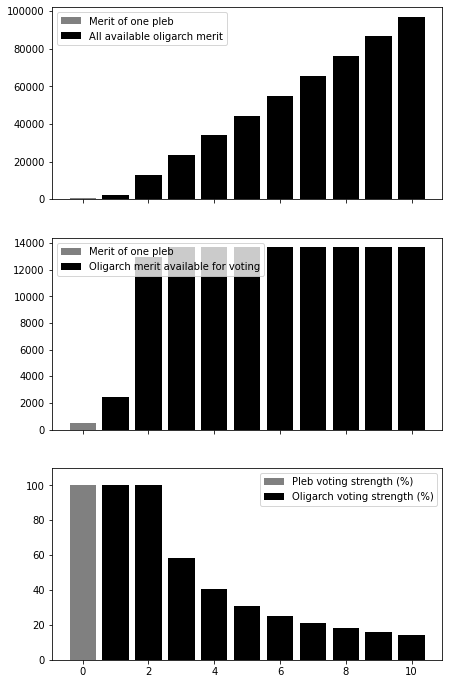

In [217]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(7, 12))

axes[0].bar(0, pleb_merit[-1], color='gray', label='Merit of one pleb')
axes[0].bar(list(range(1, 1 + len(oligarch_merit))), oligarch_merit, color='black', label='All available oligarch merit')
axes[0].legend()

axes[1].bar(0, pleb_merit[-1], color='gray', label='Merit of one pleb')
axes[1].bar(list(range(1, 1 + len(oligarch_merit))), clamped_oligarch_vote, color='black', label='Oligarch merit available for voting')
axes[1].legend()

axes[2].set_ylim(0, 110)
axes[2].bar(0, (pleb_voting_strength * 100)[-1], color='gray', label='Pleb voting strength (%)')
axes[2].bar(list(range(1, 1 + len(oligarch_merit))), oligarch_voting_strength * 100, color='black', label='Oligarch voting strength (%)')
axes[2].legend()

In [218]:
print(f'Total oligarch merit available for voting: {sum(clamped_oligarch_vote):.2f}')
print(f'Total pleb merit available for voting: {sum(clamped_pleb_vote):.2f}')
print(f'Total merit available for voting: {sum(clamped_oligarch_vote) + sum(clamped_pleb_vote):.2f}')
print(f'Oligarch strength (in % amount of merit they can vote with): {sum(clamped_oligarch_vote) / TOTAL_REP * 100:.2f}%')
print(f'Oligarch relative advantage (oligarch strength / oligarch ratio): {(sum(clamped_oligarch_vote) / TOTAL_REP) / oligarch_factor:.2f}')
print(f'Oligarch advantage over plebs (average oligarch vote / average pleb vote): {(sum(clamped_oligarch_vote) / n_oligarchs) / (sum(clamped_pleb_vote) / n_plebs):.2f}')

Total oligarch merit available for voting: 125258.02
Total pleb merit available for voting: 490000.00
Total merit available for voting: 615258.02
Oligarch strength (in % amount of merit they can vote with): 12.53%
Oligarch relative advantage (oligarch strength / oligarch ratio): 12.53
Oligarch advantage over plebs (average oligarch vote / average pleb vote): 25.31


In [219]:
rep_needed = int(TOTAL_REP * 0.51)
oligarchs_needed_to_51 = 0
for oligarch_needed in clamped_oligarch_vote[::-1]:
    if rep_needed <= 0:
        break
    oligarchs_needed_to_51 += 1
    rep_needed -= oligarch_needed


plebs_needed_to_51 = 0
for pleb_vote in clamped_pleb_vote[::-1]:
    if rep_needed <= 0:
        break
    plebs_needed_to_51 += 1
    rep_needed -= pleb_vote
print(f'Minimum number of people needed to reach 51%: {oligarchs_needed_to_51 + plebs_needed_to_51}/{N_VOTERS} ({oligarchs_needed_to_51}/{n_oligarchs} oligarchs, {plebs_needed_to_51}/{n_plebs} plebs)')

Minimum number of people needed to reach 51%: 788/1000 (10/10 oligarchs, 778/990 plebs)
